In [119]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
print(os.listdir("../input"))

[]


# 1. Generate Samples

In [120]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets.samples_generator import make_classification

In [121]:
X,y = make_classification(n_samples=1000, n_features=3, n_redundant=0, 
                          n_classes=3, n_informative=2, n_clusters_per_class=1, 
                          class_sep=0.5, random_state=10)

In [122]:
print(X.shape)
X

(1000, 3)


array([[ 0.05175328, -0.91952579,  1.23943184],
       [-0.06851406, -1.09510487,  1.42925019],
       [-0.66309231,  0.02605059, -0.22108279],
       ...,
       [-0.0272292 , -1.46334344,  1.02506074],
       [ 1.24093104,  0.88811468, -1.53414671],
       [ 0.4292046 , -0.02168073, -1.09797013]])

In [123]:
y

array([2, 2, 0, 2, 1, 0, 0, 1, 2, 1, 2, 2, 1, 0, 0, 0, 1, 2, 0, 2, 0, 0,
       1, 2, 1, 0, 1, 0, 1, 0, 1, 1, 2, 2, 2, 0, 0, 1, 2, 2, 2, 0, 0, 2,
       2, 0, 1, 0, 0, 0, 2, 2, 2, 1, 0, 1, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0,
       1, 2, 1, 0, 2, 0, 1, 1, 0, 2, 0, 0, 2, 1, 1, 2, 1, 2, 0, 2, 2, 0,
       0, 1, 0, 2, 0, 0, 1, 0, 2, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 2, 2,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 2, 1, 2, 2, 1, 0, 1, 2, 0, 2, 1, 0, 1,
       2, 1, 0, 2, 2, 1, 2, 2, 1, 1, 1, 2, 1, 0, 2, 2, 0, 2, 1, 1, 2, 0,
       2, 2, 2, 2, 1, 1, 2, 1, 0, 2, 1, 2, 2, 1, 0, 0, 2, 1, 1, 0, 0, 0,
       0, 0, 2, 1, 0, 0, 1, 0, 2, 0, 2, 2, 2, 0, 1, 1, 1, 2, 0, 1, 2, 2,
       0, 1, 1, 2, 0, 2, 1, 1, 2, 1, 2, 2, 2, 2, 0, 1, 1, 1, 2, 2, 0, 0,
       0, 1, 1, 1, 2, 1, 2, 1, 0, 1, 0, 2, 1, 0, 1, 1, 0, 2, 0, 0, 0, 2,
       1, 1, 1, 1, 0, 1, 1, 2, 1, 2, 1, 0, 2, 1, 1, 1, 2, 1, 2, 1, 1, 1,
       1, 2, 2, 0, 2, 1, 2, 0, 2, 2, 2, 0, 1, 0, 2, 2, 2, 2, 0, 1, 2, 2,
       2, 2, 2, 1, 0, 1, 1, 2, 0, 2, 2, 0, 0, 1, 0,

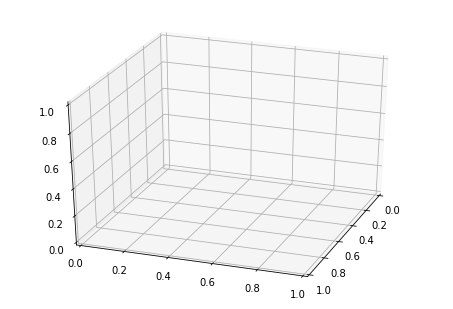

In [124]:
fig = plt.figure()
ax = Axes3D(fig, rect=[0,0,1,1], elev=30, azim=20)

/opt/conda/lib/python3.6/site-packages/matplotlib/collections.py:902: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


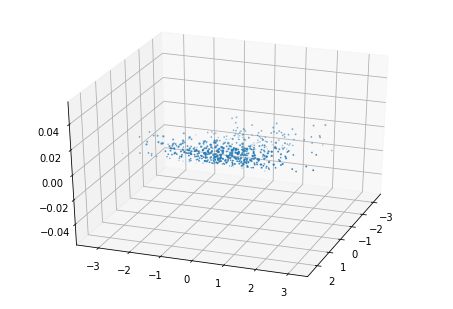

In [125]:
fig = plt.figure()
ax = Axes3D(fig, rect=[0,0,1,1], elev=30, azim=20)
plt.scatter(X[:,0], X[:,1], X[:,2], marker='o')

# 2. PCA
with no labels to decomposition

In [126]:
from sklearn.decomposition import PCA

In [127]:
pca = PCA(n_components=2)

In [128]:
X_pca = pca.fit_transform(X)
X_pca 

array([[-0.77856636,  0.97415331],
       [-1.01408135,  1.13368518],
       [ 0.0405455 , -0.20907646],
       ...,
       [-0.68896856,  1.47089361],
       [ 2.27723983, -0.74014291],
       [ 1.38678837,  0.00518624]])

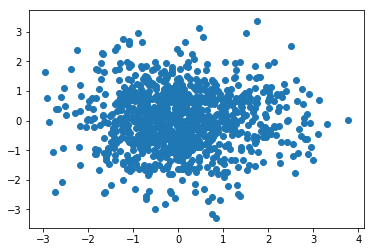

In [129]:
plt.scatter(X_pca[:,0], X_pca[:,1], marker='o')

# 3. LDA (Linear Discriminant Analysis 线性判别分析)

In [130]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [131]:
lda = LinearDiscriminantAnalysis(n_components=2)

In [132]:
# X_lda = lda.fit_transform(X)
# TypeError: fit() missing 1 required positional argument: 'y'
# YES! LDA needs label to discriminant/decomposition

In [133]:
X_lda = lda.fit_transform(X, y)

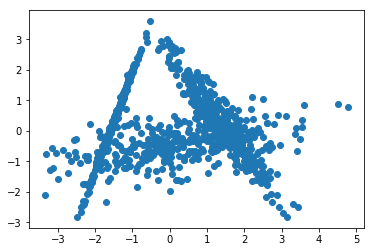

In [134]:
plt.scatter(X_lda[:,0], X_lda[:,1], marker='o')

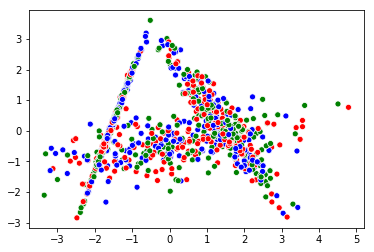

In [135]:
sns.scatterplot(X_lda[:,0], X_lda[:,1], c=['r','b','g'])

# 4. Make it better

In [136]:
y = y.reshape(-1,1)
y.shape

(1000, 1)

In [137]:
X.shape

(1000, 3)

In [138]:
data_arr = np.hstack((X,y))

In [139]:
data_df = pd.DataFrame(data_arr, columns=['x1','x2','x3','label'])

In [140]:
data_df.head()

,x1,x2,x3,label
0,0.051753,-0.919526,1.239432,2.0
1,-0.068514,-1.095105,1.429250,2.0
2,-0.663092,0.026051,-0.221083,0.0
3,1.508652,-0.546376,-1.142697,2.0
4,-0.733072,0.064409,-0.451013,1.0


In [141]:
lda_model = LinearDiscriminantAnalysis(n_components=2)
lda_feature_arr = lda_model.fit_transform(data_df[['x1','x2','x3']],data_df['label'])
lda_feature_arr

array([[-1.81735217, -0.7363639 ],
       [-1.88125885, -0.97770554],
       [ 1.25387685, -0.02999895],
       ...,
       [-1.45643374, -0.75257159],
       [-0.0340475 ,  2.26777693],
       [ 0.63442174,  1.26269825]])

In [142]:
lda_feature_df = pd.DataFrame(lda_feature_arr)
lda_df = pd.concat((lda_feature_df,data_df['label'].astype(int)), axis=1)
lda_df.head()

,0,1,label
0,-1.817352,-0.736364,2
1,-1.881259,-0.977706,2
2,1.253877,-0.029999,0
3,-1.062384,1.891396,2
4,1.661833,0.086806,1


In [143]:
# lda_df.sort_values(by='label')

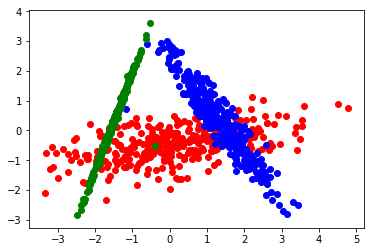

In [144]:
plt.scatter(lda_df[lda_df.label==0][0], lda_df[lda_df.label==0][1], c='r')
plt.scatter(lda_df[lda_df.label==1][0], lda_df[lda_df.label==1][1], c='b')
plt.scatter(lda_df[lda_df.label==2][0], lda_df[lda_df.label==2][1], c='g')